In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
import gensim
from gensim.models import CoherenceModel
from gensim import corpora
import pandas as pd
from pprint import pprint
import string
import os
import re

In [2]:
#data loader class
class DataLoader:
    def __init__(self,dir_name,file_name):
        self.dir_name=dir_name
        self.file_name = file_name
    
 
    def read_csv(self):
        os.chdir(self.dir_name)
        tweets_df=pd.read_csv(self.file_name)
        return tweets_df
  

In [3]:
#object creation
DataLoader_obj= DataLoader('../data/','cleaned_tweet_data.csv')

In [4]:
tweets_df=DataLoader_obj.read_csv()
tweets_df.dropna()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,clean_text
5,2022-08-07 22:31:02+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @benedictrogers: We must not let this happe...,0.200000,0.500000,en,41770,36,GraceCh15554845,207,54,False,['Taiwan'],['benedictrogers'],"Melbourne, Victoria",we must not let this happen\n\nwe must be rea...
11,2022-08-07 22:30:35+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...","Wilson Chinonso Blog: Nigerian tribes, the lis...",0.000000,0.000000,en,134,0,wilson_chnns,28,265,False,"['China', 'ChinaTaiwan', 'ManUnited']",[],Imo State Nigeria,wilson chinonso blog nigerian tribes the list ...
19,2022-08-07 22:30:01+00:00,"<a href=""https://buffer.com"" rel=""nofollow"">Bu...",27.89US $ 17% OFF|Usb Condenser Microphone For...,0.000000,0.000000,en,265,0,doos94619918,1936,4792,False,"['aliexpress', 'USA', 'uk', 'RT', 'Europe', 'U...",[],"United States New York,",2789us 17 offusb condenser microphone for pc ...
36,2022-08-07 22:26:25+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @ChinaInfo777: #PinkFloyd Roger Waters tell...,0.000000,0.000000,en,91839,5,nhohn2011,870,508,False,"['PinkFloyd', 'Taiwan', 'China']",['ChinaInfo777'],"Florida, USA",roger waters tells it as it is is a part of
39,2022-08-07 22:25:37+00:00,"<a href=""http://twitter.com/download/android"" ...","RT @WilliamYang120: ""For too long, #Taiwan has...",-0.025000,0.200000,en,46145,84,hoggothoaryhost,44,60,False,['Taiwan'],['WilliamYang120'],Hong Kong,for too long has been bullied marginalized a...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21978,2022-08-06 18:04:09+00:00,"<a href=""https://mobile.twitter.com"" rel=""nofo...",RT @jenniferatntd: Head of #Taiwan's #missile ...,-0.200000,0.400000,en,6660,99,threadmaxwhispe,657,864,False,"['Taiwan', 'missile']",['jenniferatntd'],Land of Ethan South Dakota,head of s programme is found dead in hotel m...
21986,2022-08-06 18:03:48+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Minister Wu is crystal clear in his @BBCNews i...,0.158333,0.419444,en,3129,0,TECO_Toronto,955,202,False,"['Taiwan', 'StandWithTaiwan', 'DefendDemocracy']","['BBCNews', 'SpeakerPelosi']","Toronto, Canada",minister wu is crystal clear in his interview...
21987,2022-08-06 18:03:47+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @SpokespersonCHN: #PLA Live-fire military d...,-0.100000,0.250000,en,175203,405,mumaralid,1164,605,True,"['PLA', 'Taiwan']",['SpokespersonCHN'],Driver,livefire military drills in the straits com...
21989,2022-08-06 18:03:33+00:00,"<a href=""http://twitter.com/download/iphone"" r...",RT @jenniferatntd: Head of #Taiwan's #missile ...,-0.200000,0.400000,en,14305,99,9thousandbytes,401,858,False,"['Taiwan', 'missile']",['jenniferatntd'],Northern Virginia,head of s programme is found dead in hotel m...


In [5]:
len(tweets_df)

21997

In [6]:
tweets_df.head()

,created_at,source,original_text,polarity,subjectivity,lang,favorite_count,retweet_count,original_author,followers_count,friends_count,possibly_sensitive,hashtags,user_mentions,place,clean_text
0,2022-08-07 22:31:20+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @i_ameztoy: Extra random image (I):\n\nLets...,-1.250000e-01,0.190625,en,15760,2,i_ameztoy,20497,2621,NaN,['City'],['i_ameztoy'],NaN,extra random image i\n\nlets focus in one ver...
1,2022-08-07 22:31:16+00:00,"<a href=""http://twitter.com/download/android"" ...",RT @IndoPac_Info: #China's media explains the ...,-1.000000e-01,0.100000,en,6967,201,ZIisq,65,272,NaN,"['China', 'Taiwan']",['IndoPac_Info'],NaN,s media explains the military reasons for eac...
2,2022-08-07 22:31:07+00:00,"<a href=""http://twitter.com/download/android"" ...","China even cut off communication, they don't a...",0.000000e+00,0.000000,en,2166,0,Fin21Free,85,392,NaN,['XiJinping'],['ZelenskyyUa'],Netherlands,china even cut off communication they dont anw...
3,2022-08-07 22:31:06+00:00,"<a href=""http://twitter.com/download/android"" ...","Putin to #XiJinping : I told you my friend, Ta...",1.000000e-01,0.350000,en,2166,0,Fin21Free,85,392,NaN,['XiJinping'],[],Netherlands,putin to i told you my friend taiwan will be...
4,2022-08-07 22:31:04+00:00,"<a href=""http://twitter.com/download/iphone"" r...","RT @ChinaUncensored: I’m sorry, I thought Taiw...",-6.938894e-18,0.556250,en,17247,381,VizziniDolores,910,2608,NaN,[],['ChinaUncensored'],"Ayent, Schweiz",i’m sorry i thought taiwan was an independent...


In [7]:
class PrepareData:
    def __init__(self,df):
        self.df=df
    
    def preprocess_data(self):
        tweets_df = self.df.loc[self.df['lang'] =="en"]


        #text Preprocessing
        tweets_df['clean_text']=tweets_df['clean_text'].astype(str)
        tweets_df['clean_text'] = tweets_df['clean_text'].apply(lambda x: x.lower())
        tweets_df['clean_text']= tweets_df['clean_text'].apply(lambda x: x.translate(str.maketrans(' ', ' ', string.punctuation)))

        #Converting tweets to list of words For feature engineering
        sentence_list = [tweet for tweet in tweets_df['clean_text']]
        word_list = [sent.split() for sent in sentence_list]
        # print(word_list)

        #Create dictionary which contains Id and word 
        word_to_id = corpora.Dictionary(word_list) #generate unique tokens
        #  we can see the word to unique integer mapping
        # print(word_to_id.token2id)
        # using bag of words(bow), we create a corpus that contains the word id and its frequency in each document.
        corpus_1= [word_to_id.doc2bow(tweet) for tweet in word_list]


        return word_list, word_to_id, corpus_1


In [8]:
PrepareData_obj=PrepareData(tweets_df)
word_list ,id2word,corpus=PrepareData_obj.preprocess_data()

In [9]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus,
                                           id2word=id2word,
                                           num_topics=5, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [10]:
pprint(lda_model.print_topics())

[(0,
  '0.060*"is" + 0.042*"this" + 0.039*"by" + 0.037*"the" + 0.035*"of" + '
  '0.024*"part" + 0.023*"president" + 0.021*"world" + 0.017*"not" + '
  '0.013*"did"'),
 (1,
  '0.056*"the" + 0.033*"of" + 0.029*"in" + 0.023*"a" + 0.022*"to" + '
  '0.021*"and" + 0.020*"for" + 0.020*"with" + 0.011*"from" + 0.009*"will"'),
 (2,
  '0.049*"on" + 0.041*"to" + 0.028*"s" + 0.028*"a" + 0.025*"the" + 0.021*"and" '
  '+ 0.020*"of" + 0.018*"in" + 0.018*"taiwan" + 0.018*"visit"'),
 (3,
  '0.089*"the" + 0.043*"is" + 0.036*"to" + 0.023*"you" + 0.022*"of" + '
  '0.018*"as" + 0.017*"your" + 0.017*"so" + 0.016*"china" + 0.014*"military"'),
 (4,
  '0.041*"the" + 0.031*"about" + 0.029*"they" + 0.027*"island" + 0.025*"are" + '
  '0.022*"amp" + 0.021*"to" + 0.017*"minister" + 0.016*"how" + 0.016*"now"')]


In [11]:
# Compute Perplexity

#It's a measure of how good the model is. The lower the better. Perplexity is a negative value
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  
doc_lda = lda_model[corpus]


# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=word_list, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\n Ldamodel Coherence Score/Accuracy on Tweets: ', coherence_lda)


Perplexity:  -7.397535241188185

 Ldamodel Coherence Score/Accuracy on Tweets:  0.28737370251637306


In [13]:
import pyLDAvis.gensim_models as gensimvis
import pickle 
import pyLDAvis
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_prepared = gensimvis.prepare(lda_model, corpus, id2word)
LDAvis_prepared

/home/hmicheal/.conda/envs/10x/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/home/hmicheal/.conda/envs/10x/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/home/hmicheal/.conda/envs/10x/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for removal in Python 3.12; see the module's documentation for alternative uses
  from imp import reload
/home/hmicheal/.conda/envs/10x/lib/python3.10/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib and slated for remov

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2      0.081914  0.147325       1        1  32.178246
1     -0.111791  0.213909       2        1  28.610689
3      0.074830 -0.016710       3        1  14.899613
4     -0.282377 -0.182558       4        1  13.244369
0      0.237424 -0.161966       5        1  11.067084, topic_info=      Term          Freq         Total Category  logprob  loglift
115     is   6918.000000   6918.000000  Default  30.0000  30.0000
106     on   6543.000000   6543.000000  Default  29.0000  29.0000
99    this   2720.000000   2720.000000  Default  28.0000  28.0000
15     the  17843.000000  17843.000000  Default  27.0000  27.0000
137     by   2719.000000   2719.000000  Default  26.0000  26.0000
..     ...           ...           ...      ...      ...      ...
60      it    443.691049   1639.319641   Topic5  -4.5539   0.8943
405   over    348.353542    806.608277   Topic5  -4.7958   1.3616
24     for    508.661367   3648.207761   Topic5  -4.4172   0.2310
37   china    412.163721   2557.057487   Topic5  -4.6276   0.3760
111    and    382.532976   5569.882577   Topic5  -4.7022  -0.4771

[277 rows x 6 columns], token_table=       Topic      Freq Term
term                       
402        5  0.993642  160
249        4  0.998147    3
163        1  0.999316  4th
54         1  0.537874    a
54         2  0.393826    a
...      ...       ...  ...
545        3  0.912167   🇹🇼
12590      2  0.005851    🎁
12590      4  0.005851    🎁
12590      5  0.988881    🎁
839        5  0.998611    😈

[315 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 4, 5, 1])

# Sentiment Analysis

In [13]:
import numpy as np 
import pandas as pd 
import os
import re
import nltk 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
#data loader class
class DataLoader:
    def __init__(self,dir_name,file_name):
        self.dir_name=dir_name
        self.file_name = file_name
    
 
    def read_csv(self):
        os.chdir(self.dir_name)
        tweets_df=pd.read_csv(self.file_name)
        return tweets_df
  


In [15]:
DataLoader_obj= DataLoader('../data/','cleaned_tweet_data.csv')

In [16]:
tweets_df = DataLoader_obj.read_csv()

In [19]:
tweets_df.columns

Index(['created_at', 'source', 'original_text', 'polarity', 'subjectivity',
       'lang', 'favorite_count', 'retweet_count', 'original_author',
       'followers_count', 'friends_count', 'possibly_sensitive', 'hashtags',
       'user_mentions', 'place', 'clean_text'],
      dtype='object')

In [52]:
def text_category(p: float) -> str:
    if p > 0:
        return "positive"
    else:
        return "negative"

In [59]:
tweets_df['polarity'] = tweets_df['polarity'].apply(pd.to_numeric)
tweets_df['score'] = tweets_df['polarity'].apply(text_category)

Index(['created_at', 'source', 'original_text', 'polarity', 'subjectivity',
       'lang', 'favorite_count', 'retweet_count', 'original_author',
       'followers_count', 'friends_count', 'possibly_sensitive', 'hashtags',
       'user_mentions', 'place', 'clean_text', 'score'],
      dtype='object')

In [60]:
# Selecting the feature and the label
features = tweets_df.iloc[:, -2].values
labels = tweets_df.iloc[:, -1].values
print(labels)

['negative' 'negative' 'negative' ... 'positive' 'positive' 'positive']


# Plots Distribution

<AxesSubplot:title={'center':'score'}>

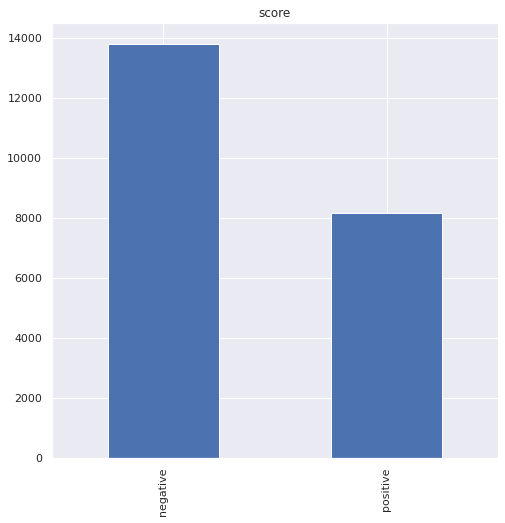

In [61]:
score_count =  tweets_df['score'].value_counts()
score_count.plot(kind="bar", y="score", title="score", figsize=[8, 8])

In [62]:
# Data Cleaning using regular expression
processed_features = []

for sentence in range(0, len(features)):
    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', str(features[sentence]))

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    processed_features.append(processed_feature)

In [63]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/hmicheal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [64]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))
processed_features_vectorized = vectorizer.fit_transform(processed_features).toarray()

# Split dataset

In [65]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features_vectorized, labels, test_size=0.2, random_state=0)

# Training the model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

# Prediction

In [ ]:
predictions = text_classifier.predict(X_test)

In [ ]:
predictions[:10]

In [ ]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, predictions))